# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
!pip3 install pyspark

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 317.0 MB 2.2 MB/s eta 0:00:01     |████████████████████████▉       | 245.7 MB 1.9 MB/s eta 0:00:38
     |████████████████████████████████| 200 kB 2.4 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488511 sha256=06aaae0a5daa0fbc165d37ec18046cc595a6eebde1c7b907c21d60a2165444be
  Stored in directory: /Users/blockhole/Library/Caches/pip/wheels/92/09/11/aa01d01a7f005fda8a66ad71d2be7f8aa341bddafb27eee3c7
Successfully built pyspark
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
# Import necessary libraries
from pyspark.sql import SparkSession
import pandas as pd

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Excel to PySpark DataFrame") \
    .getOrCreate()

# Path to the Excel file
excel_file_path = "Online Retail.xlsx"

# Load Excel file into pandas DataFrame
pandas_df = pd.read_excel(excel_file_path)

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(pandas_df)

# Show the first few rows of the PySpark DataFrame
spark_df.show()


/var/folders/c3/sd11kwqd5znf3wkdv8vg02f00000gn/T/ipykernel_45456/2811806459.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
24/04/20 16:38:13 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/04/20 16:38:52 WARN TaskSetManager: Stage 0 contains a task of very large size (4288 KiB). The maximum recommended task size is 1000 KiB.
24/04/20 16:38:57 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 0 (TID 0): Attempting to kill Python Worker


+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

In [11]:
spark_df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [17]:
spark_df.select('Country').show()

24/04/20 17:20:44 WARN TaskSetManager: Stage 1 contains a task of very large size (4288 KiB). The maximum recommended task size is 1000 KiB.


+--------------+
|       Country|
+--------------+
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
|United Kingdom|
+--------------+
only showing top 20 rows



24/04/20 17:20:48 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 1 (TID 1): Attempting to kill Python Worker


In [21]:
spark_df = spark_df.drop(*['InvoiceNo','StockCode'])

In [22]:
spark_df.show()

24/04/20 17:23:44 WARN TaskSetManager: Stage 3 contains a task of very large size (4288 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+--------+-------------------+---------+----------+--------------+
|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+--------------------+--------+-------------------+---------+----------+--------------+
|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|GLASS STAR FROSTE...|       6|2010-12-01 08:26:00|     4.25|   17850.0|United Kingdom|
|HAND WARMER UNION...|       6|2010-12-01 08:28:00|     1.85|   17850.0|United Kingdom|
|HAND WARMER RED P...|       6|2

24/04/20 17:23:48 WARN PythonRunner: Detected deadlock while completing task 0.0 in stage 3 (TID 3): Attempting to kill Python Worker


In [24]:
value_counts_result = spark_df.groupBy('Description').count().orderBy('count',ascending=False)
value_counts_result.show()

24/04/20 17:27:49 WARN TaskSetManager: Stage 4 contains a task of very large size (4288 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+-----+
|         Description|count|
+--------------------+-----+
|WHITE HANGING HEA...| 2369|
|REGENCY CAKESTAND...| 2200|
|JUMBO BAG RED RET...| 2159|
|       PARTY BUNTING| 1727|
|LUNCH BAG RED RET...| 1638|
|ASSORTED COLOUR B...| 1501|
|SET OF 3 CAKE TIN...| 1473|
|                 NaN| 1454|
|PACK OF 72 RETROS...| 1385|
|LUNCH BAG  BLACK ...| 1350|
|NATURAL SLATE HEA...| 1280|
|             POSTAGE| 1252|
|JUMBO BAG PINK PO...| 1251|
|HEART OF WICKER S...| 1237|
|JAM MAKING SET WI...| 1229|
|JUMBO STORAGE BAG...| 1214|
|PAPER CHAIN KIT 5...| 1210|
|JUMBO SHOPPER VIN...| 1202|
| LUNCH BAG CARS BLUE| 1197|
|LUNCH BAG SPACEBO...| 1192|
+--------------------+-----+
only showing top 20 rows



In [30]:
description = spark_df.select([c for c in spark_df.columns if c != 'Description']).describe()
description.show()

24/04/20 17:32:45 WARN TaskSetManager: Stage 13 contains a task of very large size (4288 KiB). The maximum recommended task size is 1000 KiB.


+-------+-----------------+------------------+----------+-----------+
|summary|         Quantity|         UnitPrice|CustomerID|    Country|
+-------+-----------------+------------------+----------+-----------+
|  count|           541909|            541909|    541909|     541909|
|   mean| 9.55224954743324|4.6111136260895895|       NaN|       NULL|
| stddev|218.0811578502339| 96.75985306117953|       NaN|       NULL|
|    min|           -80995|         -11062.06|   12346.0|  Australia|
|    max|            80995|           38970.0|       NaN|Unspecified|
+-------+-----------------+------------------+----------+-----------+



In [38]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
online_retail_data = pd.read_excel('Online Retail.xlsx')

In [3]:
online_retail_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
online_retail_data.shape

(541909, 8)

In [5]:
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
online_retail_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [36]:
online_retail_data.drop(columns=['InvoiceNo','StockCode','CustomerID'],inplace=True)

In [33]:
online_retail_data.dropna(inplace=True)

In [34]:
online_retail_data.isna().sum()

Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [11]:
online_retail_data.shape

(540455, 5)

In [5]:
online_retail_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,540455.0,9.603129,-80995.0,1.0,3.0,10.0,80995.0,218.007598
InvoiceDate,540455,2011-07-04 16:20:42.947035392,2010-12-01 08:26:00,2011-03-28 11:49:00,2011-07-20 11:38:00,2011-10-19 11:49:00,2011-12-09 12:50:00,NaN
UnitPrice,540455.0,4.623519,-11062.06,1.25,2.08,4.13,38970.0,96.889628


In [16]:
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     540455 non-null  int64         
 2   InvoiceDate  540455 non-null  datetime64[ns]
 3   UnitPrice    540455 non-null  float64       
 4   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.7+ MB


In [15]:
cat_cols = list(online_retail_data.select_dtypes('object').columns)
for col in cat_cols:
    print(online_retail_data[col].value_counts())
    print(50*'*')

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64
**************************************************
Country
United Kingdom          494024
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Fi

Univariate analysis

In [44]:
def hist_box(data,feature,figsize=(12,7),kde=False,bins=None):
    f,(ax_box2,ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

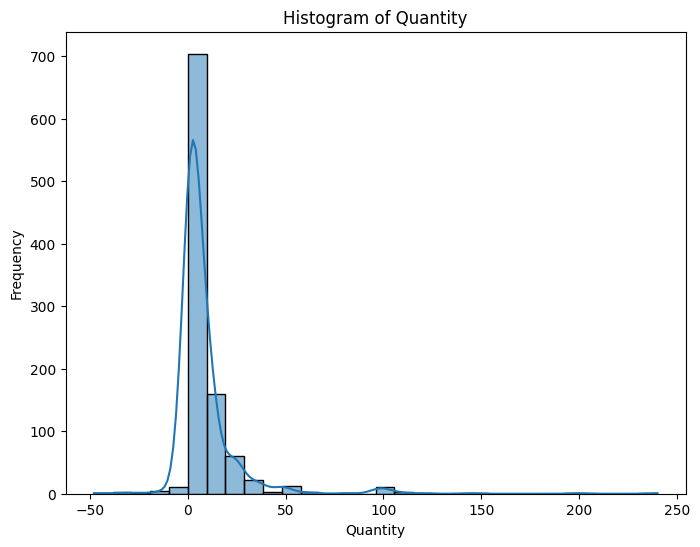

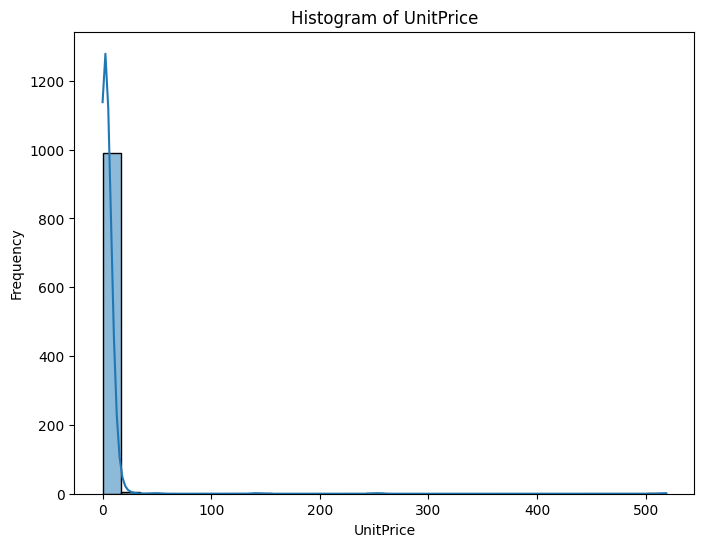

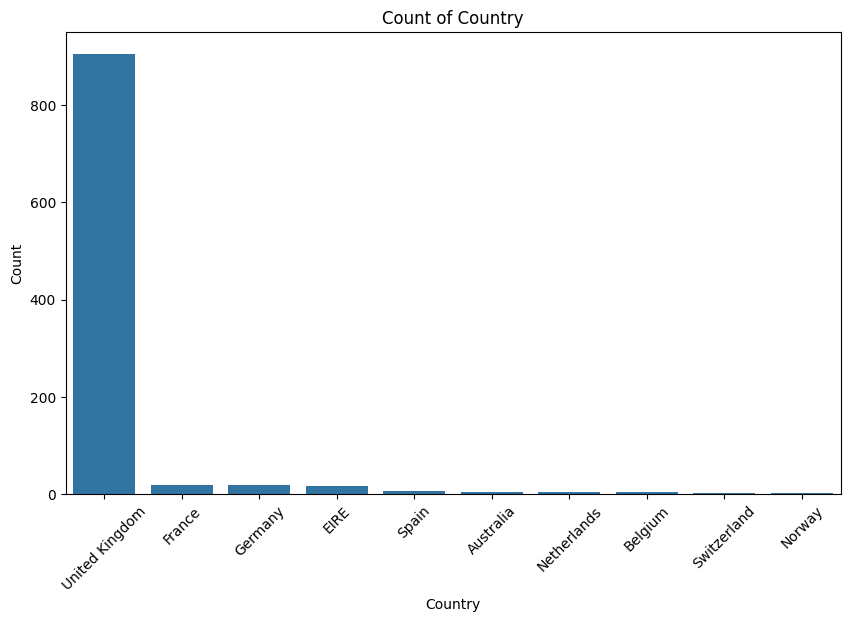

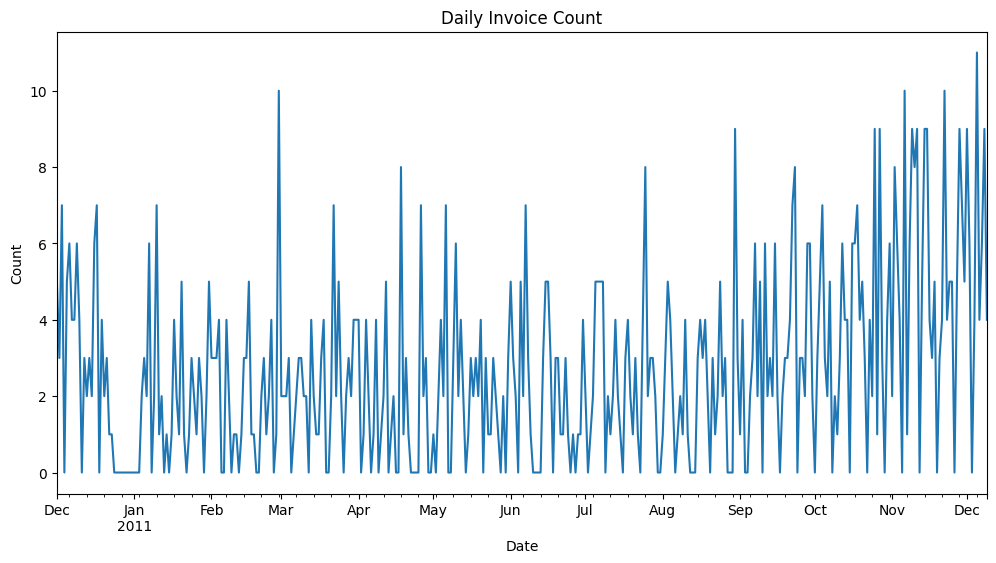

In [39]:
# Sample Data
sample_df = online_retail_data.sample(n=1000)  # Sample 1000 rows from the DataFrame for visualization

# Plotting Code (same as before)
# Histograms
numerical_columns = ['Quantity', 'UnitPrice']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(sample_df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bar Plot
categorical_columns = ['Country']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=sample_df, x=column, order=sample_df[column].value_counts().iloc[:10].index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Time Series Plot
plt.figure(figsize=(12, 6))
sample_df['InvoiceDate'] = pd.to_datetime(sample_df['InvoiceDate'])  # Convert to datetime if not already
sample_df.set_index('InvoiceDate', inplace=True)
sample_df.resample('D').size().plot()
plt.title('Daily Invoice Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


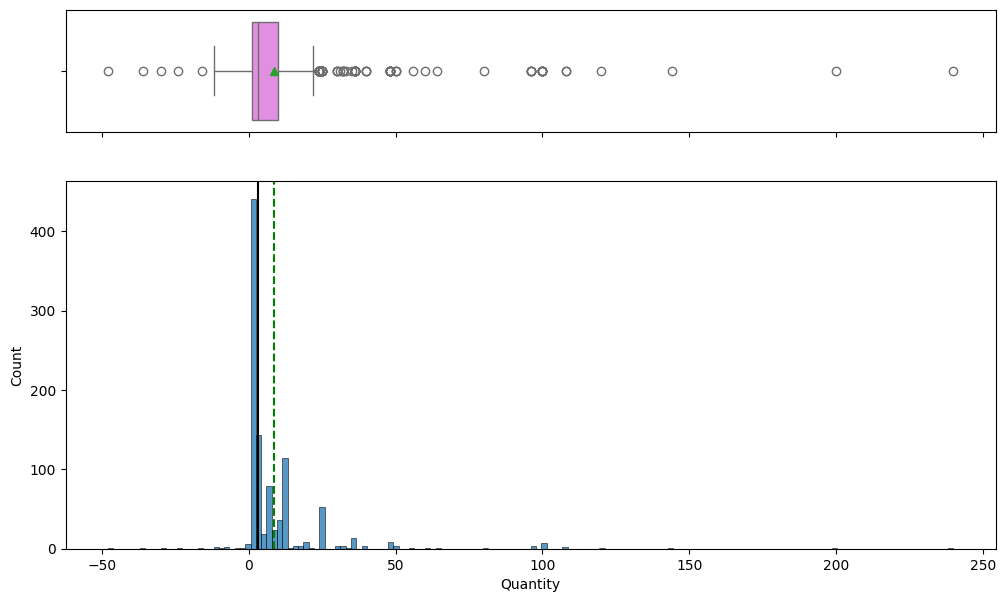

In [45]:
hist_box(sample_df,'Quantity')

Most of the quantity is between 0 to 50 and quantity is having outliers

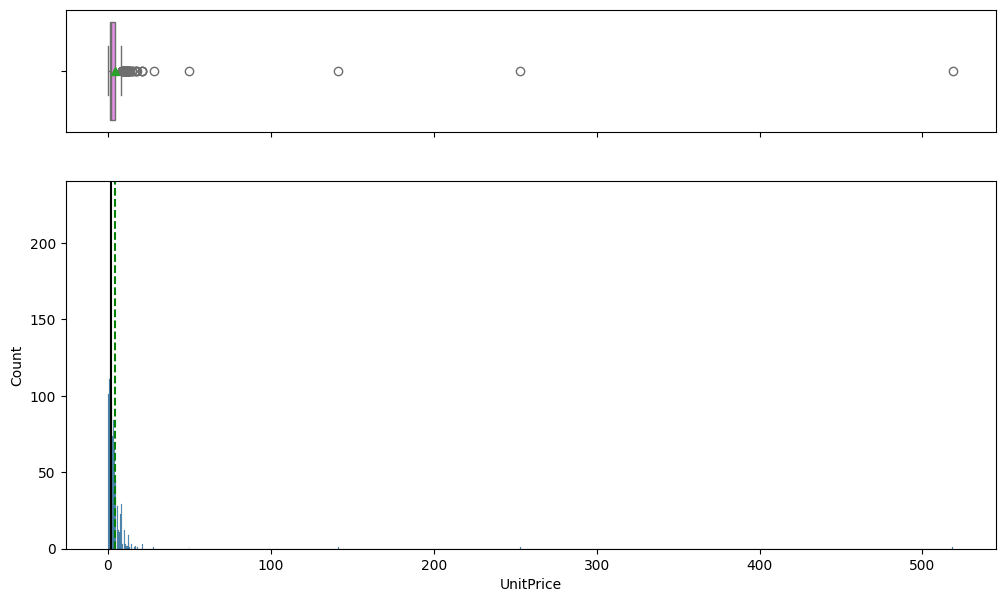

In [46]:
hist_box(sample_df,'UnitPrice')

Most of the price for the items are in between 0 to 100

<Axes: xlabel='UnitPrice'>

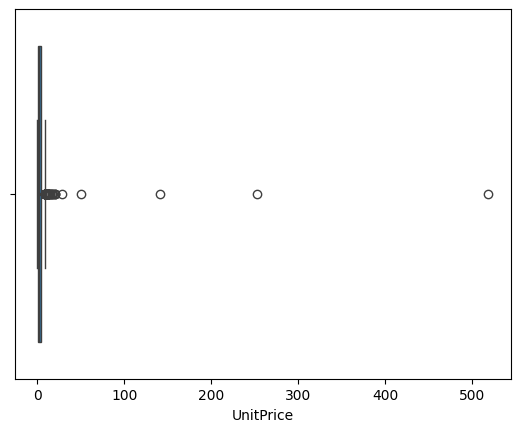

In [43]:
sns.boxplot(data = sample_df,x = 'UnitPrice')

In [47]:
online_retail_data['day'] = online_retail_data['InvoiceDate'].dt.day
online_retail_data['month'] = online_retail_data['InvoiceDate'].dt.month
online_retail_data['week'] = online_retail_data['InvoiceDate'].dt.isocalendar().week
online_retail_data.head(5)

,Description,Quantity,InvoiceDate,UnitPrice,Country,day,month,week
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,1,12,48
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,1,12,48
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,1,12,48
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,1,12,48
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,1,12,48


In [48]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

/var/folders/c3/sd11kwqd5znf3wkdv8vg02f00000gn/T/ipykernel_45456/2559097902.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


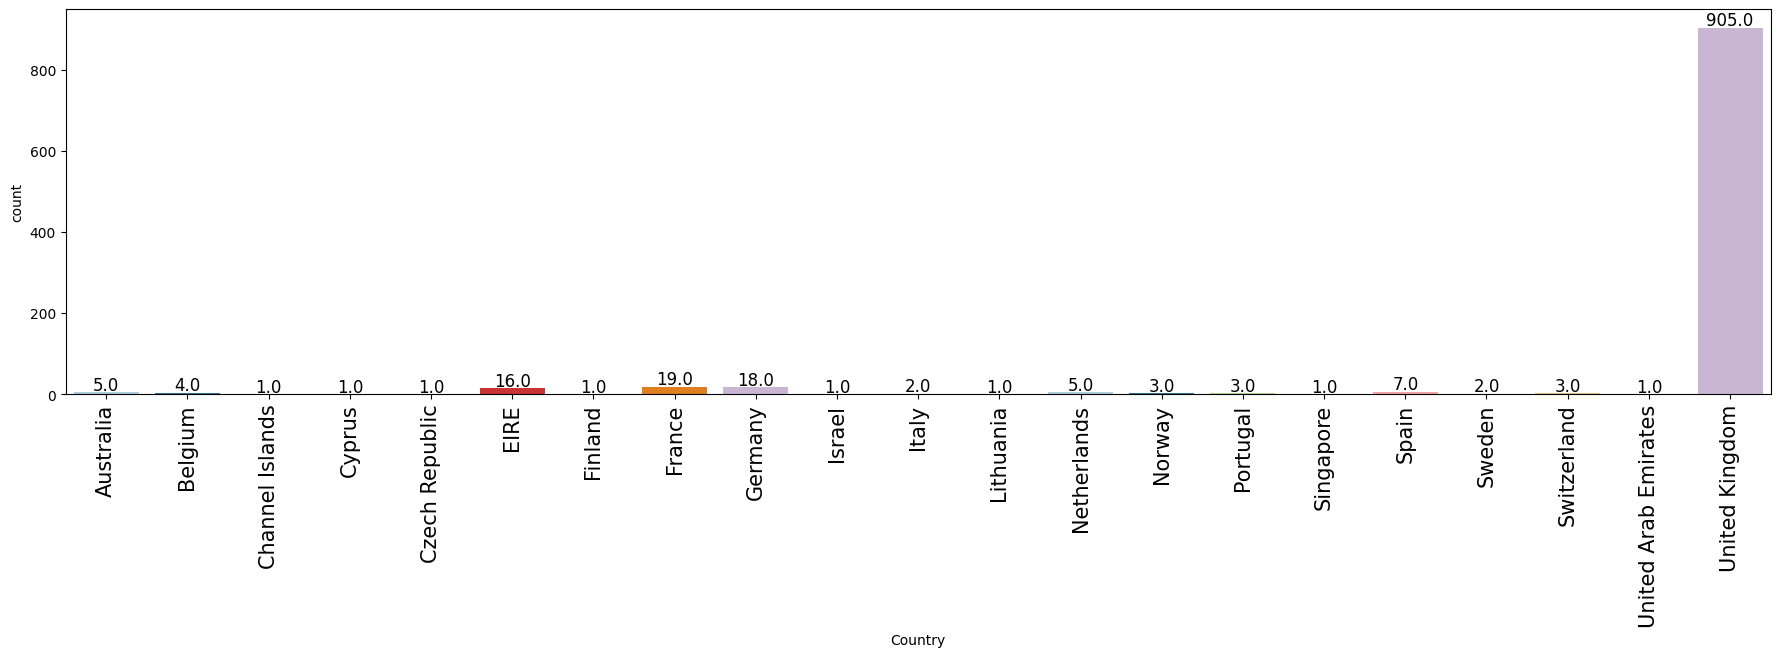

In [49]:
labeled_barplot(sample_df,'Country')

United kingdom has most of the product sold 

how to calculate busiest month and day of the week in terms of sales

In [59]:
sales_day = online_retail_data.groupby('day')['Quantity'].max()
sales_day = pd.DataFrame(sales_day)

In [62]:
sales_day.reset_index(inplace=True)

In [63]:
sales_day

,day,Quantity
0,1,1440
1,2,3000
2,3,2592
3,4,2880
4,5,1200
5,6,2000
6,7,1820
7,8,1500
8,9,80995
9,10,1296


<Axes: xlabel='day', ylabel='Quantity'>

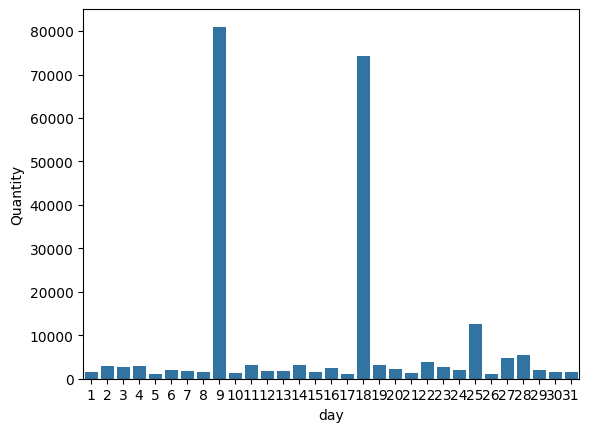

In [64]:
sns.barplot(data=sales_day,x='day',y='Quantity')

Most of the sales is done on 9,18 and 52 day 

In [65]:
sales_month = online_retail_data.groupby('month')['Quantity'].max()

In [68]:
sales_month = pd.DataFrame(sales_month)
sales_month.reset_index(inplace=True)

,Quantity
month,
1,74215
2,3906
3,3000
4,3114
5,4300
6,4000
7,3186
8,2880
9,1944


<Axes: xlabel='month', ylabel='Quantity'>

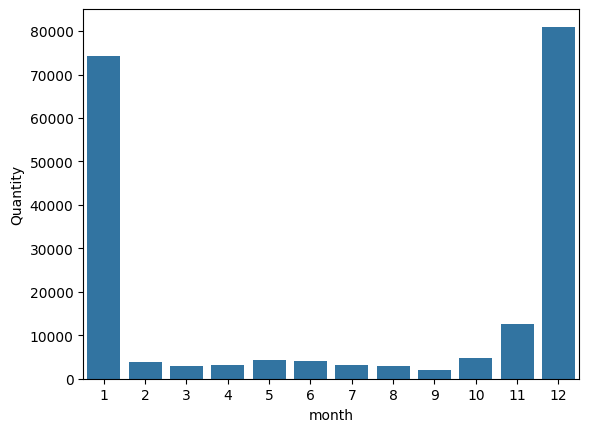

In [69]:
sns.barplot(sales_month,x='month',y='Quantity')

And on january and December most of the sales is done 

In [70]:
online_retail_data['day_name'] = online_retail_data['InvoiceDate'].dt.day_name()

In [71]:
sales_day_name = online_retail_data.groupby('day_name')['Quantity'].max()
sales_day_name

day_name
Friday       80995
Monday        3114
Sunday        2160
Thursday      4800
Tuesday      74215
Wednesday     3000
Name: Quantity, dtype: int64

In [74]:
sales_day_name = pd.DataFrame(sales_day_name)
sales_day_name.reset_index(inplace=True)

<Axes: xlabel='day_name', ylabel='Quantity'>

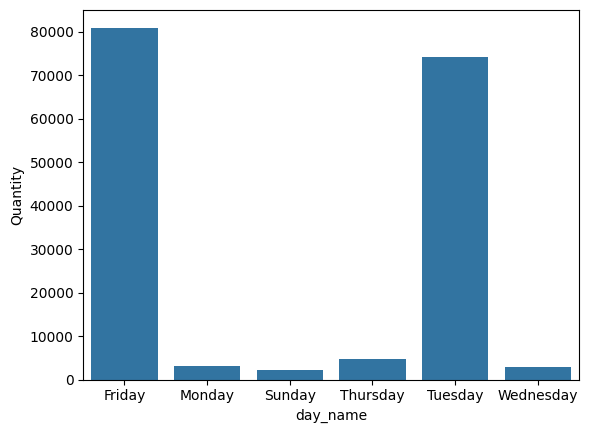

In [75]:
sns.barplot(sales_day_name,x='day_name',y='Quantity')

On friday and tuesday most of the sales are done

In [86]:
top_product_sold = online_retail_data.groupby('Country')[['Quantity','Description']]
top_product_sold

In [88]:
max_quantity_idx = online_retail_data.groupby('Country')['Quantity'].idxmax()
max_quantity_descriptions = online_retail_data.loc[max_quantity_idx, ['Country', 'Description']]
print(max_quantity_descriptions)


                     Country                          Description
321304             Australia              MINI PAINT SET VINTAGE 
130484               Austria     SET 12 KIDS COLOUR  CHALK STICKS
181141               Bahrain           ICE CREAM SUNDAE LIP GLOSS
282871               Belgium         FAIRY CAKES NOTEBOOK A7 SIZE
157300                Brazil     ROSES REGENCY TEACUP AND SAUCER 
174045                Canada           RETRO COFFEE MUGS ASSORTED
90868        Channel Islands                         RAIN PONCHO 
91380                 Cyprus       HEART DECORATION PAINTED ZINC 
383498        Czech Republic   WOODEN TREE CHRISTMAS SCANDINAVIAN
383090               Denmark     SET OF 12 MINI LOAF BAKING CASES
6365                    EIRE                ASSORTED INCENSE PACK
273219    European Community  SET OF 60 PANTRY DESIGN CAKE CASES 
34090                Finland         PACK OF 12 WOODLAND TISSUES 
423711                France                   RABBIT NIGHT LIGHT
187574    

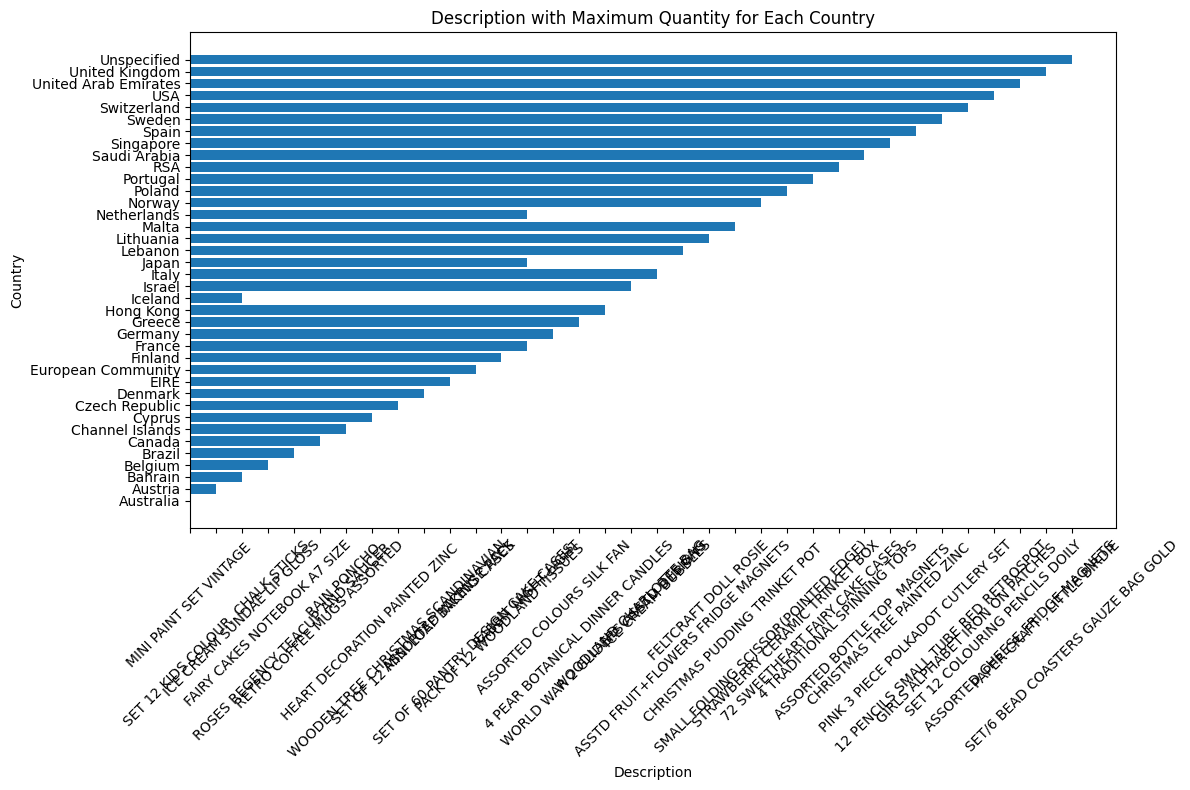

In [89]:
import matplotlib.pyplot as plt

# Assuming max_quantity_descriptions is your DataFrame with 'Country' and 'Description' columns

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart
plt.barh(max_quantity_descriptions['Country'], max_quantity_descriptions['Description'])

# Set the title and labels
plt.title('Description with Maximum Quantity for Each Country')
plt.xlabel('Description')
plt.ylabel('Country')

# Rotate the country labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


KEY FINDINGS
- The busiest month of sales is january and december
- Friday and tuesday are the days busiest day of sales
- Top contry in sales is United kingdom
- Top product PAPER CRAFT , LITTLE BIRDIE 